In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [56]:
data=pd.read_csv("forestfiressvm.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [57]:
data2=data.drop(["month","day"],axis=1)
data2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [58]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [59]:
data2.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
data2.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [61]:
data2.isna().sum().sum()

0

In [62]:
data["size_category"].unique()

array(['small', 'large'], dtype=object)

In [63]:
data["size_category1"]=data["size_category"].map({"small":0,"large":1})

<BarContainer object of 517 artists>

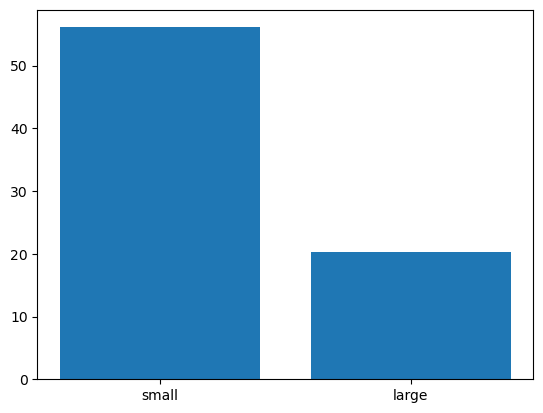

In [64]:
#visualization
plt.bar(data["size_category"],data["ISI"])

In [65]:
z=data.iloc[:,0:8]

<Axes: xlabel='DMC', ylabel='DC'>

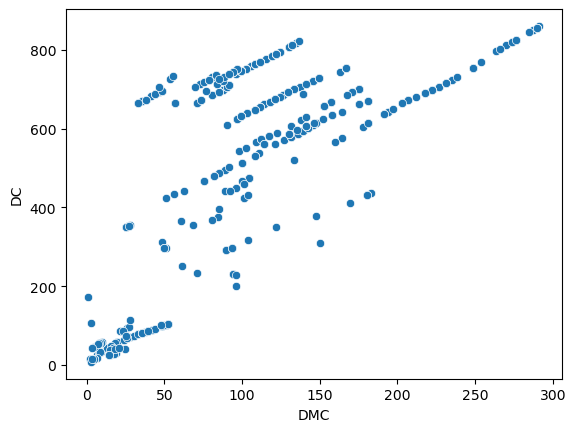

In [66]:
sns.scatterplot(x=data["DMC"],y=data["DC"])

<Axes: xlabel='temp', ylabel='wind'>

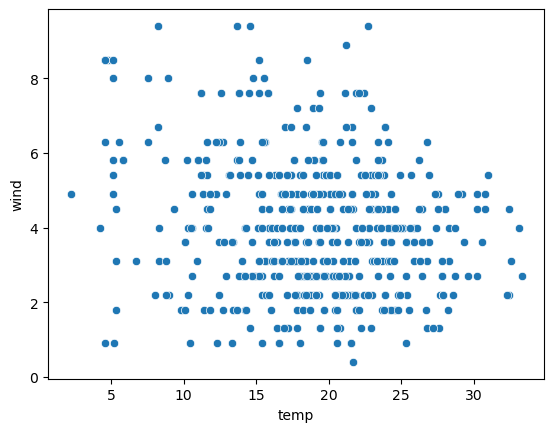

In [67]:
sns.scatterplot(x=data["temp"],y=data["wind"])

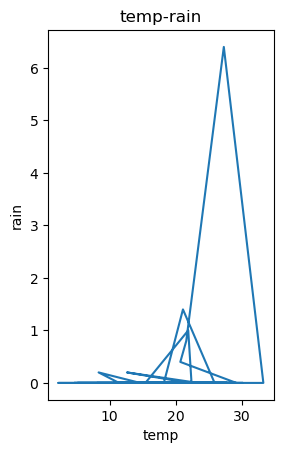

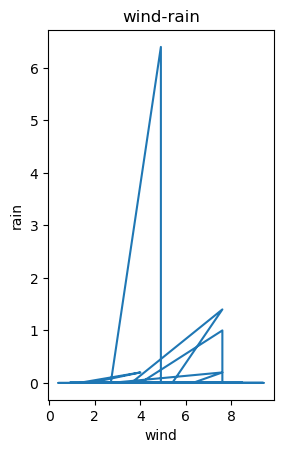

In [68]:
plt.subplot(1,2,1)
plt.plot(data["temp"],data["rain"])
plt.xlabel("temp")
plt.ylabel("rain")
plt.title("temp-rain")
plt.show()

plt.subplot(1,2,1)
plt.plot(data["wind"],data["rain"])
plt.xlabel("wind")
plt.ylabel("rain")
plt.title("wind-rain")
plt.show()

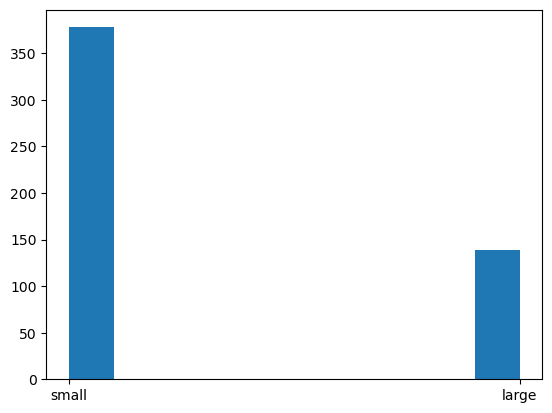

In [69]:
plt.hist(data["size_category"])
plt.show()

<BarContainer object of 517 artists>

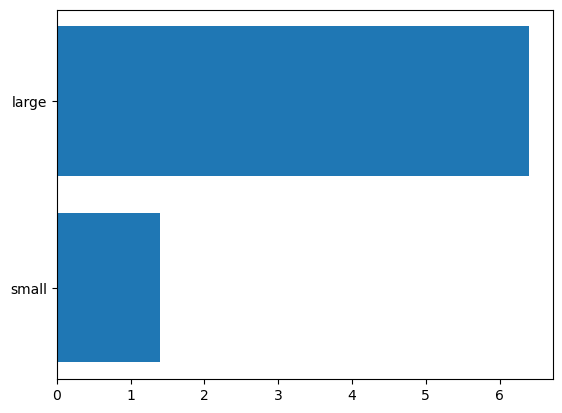

In [70]:
plt.barh(data["size_category"],data["rain"])

<BarContainer object of 517 artists>

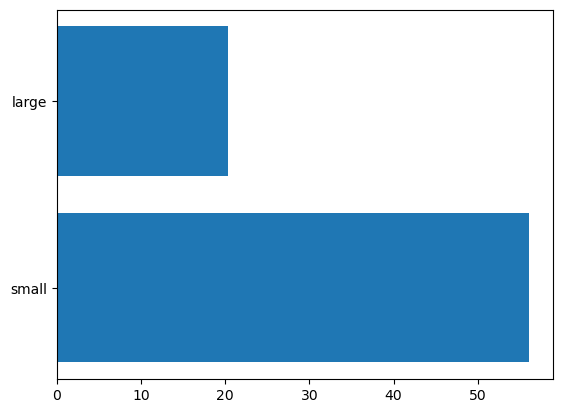

In [71]:
plt.barh(data["size_category"],data["ISI"])

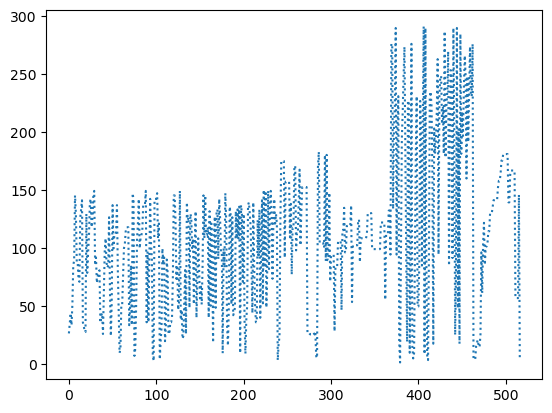

In [72]:
plt.plot(data["DMC"], linestyle = 'dotted')
plt.show()

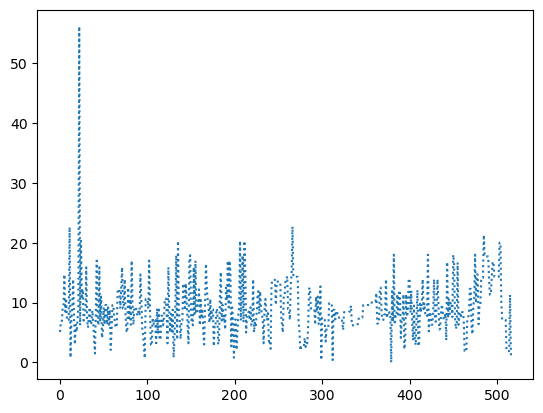

In [73]:
plt.plot(data["ISI"], linestyle = 'dotted')
plt.show()

In [74]:
x=data2.iloc[:,:28]
y=data2.iloc[:,28]

In [75]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [77]:
#normalize
def norm(p):
    i=(p-p.min())/(p.max()-p.min())
    return(i)

In [78]:
x_norm=norm(x)

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,random_state=12,test_size=0.4)

In [80]:
# svm linear model
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [81]:
pred_linear = model_linear.predict(x_test)
print(np.mean(pred_linear==y_test))

0.7294685990338164


In [82]:
#svm poly model
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)
pred_poly = model_poly.predict(x_test)
np.mean(pred_poly==y_test)

0.714975845410628

In [83]:
#svm rbf model 
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
np.mean(pred_test_rbf==y_test)

0.714975845410628

In [84]:
#svm sigmoid model
model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(x_train,y_train)
pred_test_sig = model_rbf.predict(x_test)
np.mean(pred_test_sig==y_test) 

0.714975845410628

In [85]:
# svm grid rbf search
clf= SVC()
parma_grid = [{'kernel' : ["rbf"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [86]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.7419354838709677)

In [87]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 71.49758454106279


array([[  9,  50],
       [  9, 139]], dtype=int64)

In [88]:
#svm linear grid searh
clf= SVC()
parma_grid = [{'kernel' : ["linear"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40},
 0.7612903225806452)

In [89]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 71.49758454106279


array([[  9,  50],
       [  9, 139]], dtype=int64)

In [90]:
#svm poly grid search
clf= SVC()
parma_grid = [{'kernel' : ["poly"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 40},
 0.7419354838709677)

In [91]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 71.49758454106279


array([[  9,  50],
       [  9, 139]], dtype=int64)

In [92]:
#svm sigmoid grid search
clf= SVC()
parma_grid = [{'kernel' : ["sigmoid"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 40},
 0.7419354838709677)

In [93]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 71.49758454106279


array([[  9,  50],
       [  9, 139]], dtype=int64)